In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#изменить размер графика
sns.set(rc = {'figure.figsize':(12,4)} )

<p>Описание данных:</p>

<p><a href="https://stepik.org/media/attachments/course/4852/event_data_train.zip">
    <strong>events_train.csv</strong></a> - данные о действиях, которые совершают студенты со стэпами</p>

<ol>
	<li><strong>step_id</strong>&nbsp;- id стэпа</li>
	<li><strong>user_id</strong> - анонимизированный id юзера</li>
	<li><strong>timestamp</strong>&nbsp;- время наступления события в формате unix date</li>
	<li><strong>action</strong>&nbsp;- событие, возможные значения:&nbsp;</li>
</ol>

<ul>
	<li><em>discovered</em> - пользователь перешел на стэп</li>
	<li><em>viewed</em> - просмотр шага,</li>
	<li><em>started_attempt</em> - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага</li>
	<li><em>passed</em> - удачное решение практического шага</li>
</ul>

<p><a href="https://stepik.org/media/attachments/course/4852/submissions_data_train.zip">
    <strong>submissions_train.csv</strong></a> - данные о времени и статусах сабмитов к практическим заданиям</p>

<ol>
	<li><strong>step_id</strong>&nbsp;-&nbsp;id стэпа</li>
	<li><strong>timestamp - </strong>время отправки&nbsp;решения в формате unix date</li>
	<li><strong>submission_status - </strong>статус решения</li>
	<li><strong>user_id </strong>- анонимизированный id юзера</li>
</ol>

<p><a href = "https://medium.com/datadriveninvestor/how-to-work-with-dates-in-pandas-like-a-pro-a84055a481">
    <strong>Work With Dates In Pandas Like a Pro</strong></a></p>

In [3]:
events = pd.read_csv("dataset/event_data_train.csv")
events['date'] = pd.to_datetime(events.timestamp, unit= 's')
events.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [4]:
print("Shape {}        unique users {}".format(events.shape,events.user_id.unique().size))
print("Date: {}  - {} ".format(events.date.min(),events.date.max()))
events.action.unique()

Shape (3480703, 5)        unique users 19234
Date: 2015-06-15 04:00:48  - 2018-05-19 23:33:31 


array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [5]:
events['day'] = events.date.dt.date
events.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot:xlabel='day'>

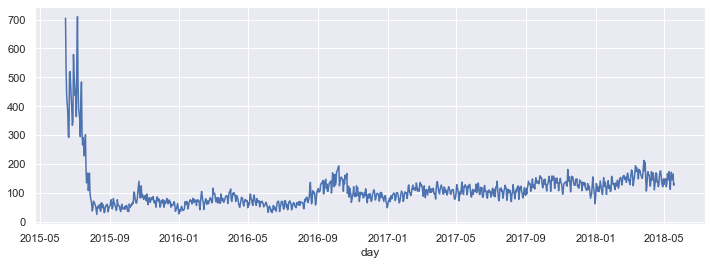

In [6]:
events.groupby("day").user_id.nunique().plot()

<AxesSubplot:>

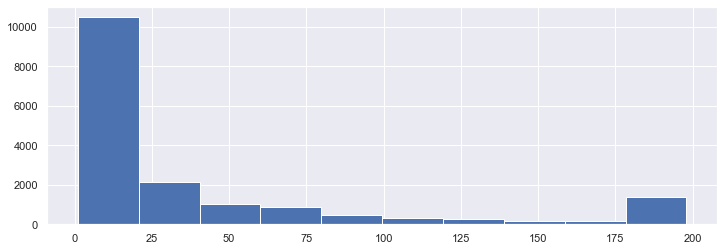

In [7]:
events[events.action == 'passed'].groupby('user_id',as_index=False).agg({'step_id':'count'}) \
      .rename(columns = {'step_id':'passed_step'} ).passed_step.hist()

<AxesSubplot:>

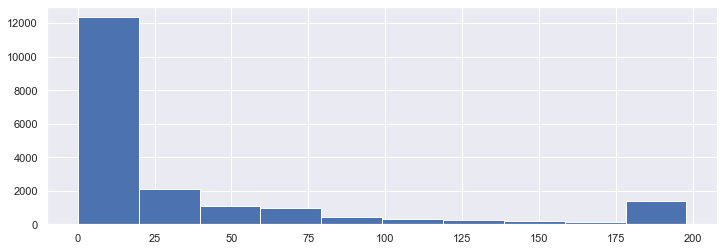

In [8]:
events.pivot_table(index = 'user_id',
                   columns='action',
                   values = 'step_id',
                   aggfunc= 'count',
                   fill_value=0).reset_index().passed.hist()


<AxesSubplot:>

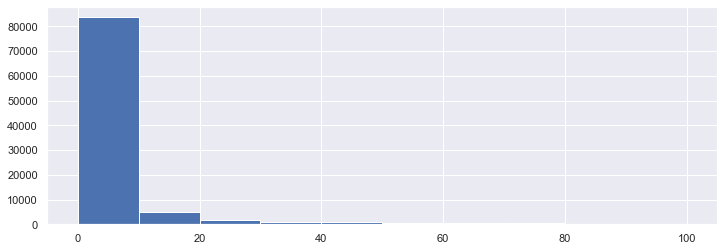

In [9]:
#Дни когда юзер был онлайн
user_days = events[['user_id','day','timestamp']].drop_duplicates(['user_id','day'])
#создать список когда юзер заходил
user_days = user_days.groupby('user_id')['timestamp'].apply(list)
#Разница между ближайшими входами в днях
gap_data = user_days.apply(np.diff).values/(24*3600)
gap_data = pd.Series(np.concatenate(gap_data, axis=0)) 
#gap_data.hist()
gap_data[gap_data < 100].hist()


In [10]:
#Через сколько дней заходят 90% пользователей
gap_data.quantile(0.90)

18.325995370370403

In [11]:
submissions = pd.read_csv("dataset/submissions_data_train.csv")
submissions['date'] = pd.to_datetime(submissions.timestamp, unit= 's')
submissions['day'] = submissions.date.dt.date
submissions.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [12]:
user_scores = submissions.pivot_table(index = 'user_id',
                   columns='submission_status',
                   values = 'step_id',
                   aggfunc= 'count',
                   fill_value=0).reset_index()

In [13]:
user_scores.head()
#user_scores[( user_scores.correct == user_scores.correct.max())]


submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [14]:
user_data = events.groupby('user_id', as_index=False) \
    .agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

In [15]:
now_timestamp = 1526772811 # 2018-05-19 23:33:31
drop_out_threshold = 30 * 24 * 3600 # 30 дневный порог 
user_data['is_gone_user'] = (now_timestamp - user_data.last_timestamp)>drop_out_threshold

In [16]:
user_data = user_data.merge(user_scores,on='user_id',how='outer').fillna(0)

In [17]:
user_events = events.pivot_table(index = 'user_id',
                   columns='action',
                   values = 'step_id',
                   aggfunc= 'count',
                   fill_value=0).reset_index()

In [18]:
user_data = user_data.merge(user_events,how='outer')

In [19]:
user_uniq_days = events.groupby('user_id').day.nunique() \
                 .to_frame().reset_index()
user_data = user_data.merge(user_uniq_days,how='outer')
#Успешное окончание курса с баллами > 170
user_data['passed_course'] = user_data.passed > 170
print("users: {}   {}" \
      .format(user_data.user_id.nunique(),events.user_id.nunique()))

users: 19234   19234


In [20]:
#Количество юзеров прошедших курс
user_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [22]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
